In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
train_df = pd.read_csv('../../datasets/training_2nd_dataset.csv')
train_df['identifier'] = train_df['domain_name'] +'-'+ train_df['city'] +'-'+ train_df['isp'] +'-'+ train_df['node_name']

used_idx = train_df['identifier'].value_counts().index.tolist()[:-11547]
train_filtered = train_df.loc[train_df['identifier'].isin(used_idx)].copy()

In [3]:
imc_cpu_p95 = np.load('../../datasets/ens/imc_cpu_p95.npy')
imc_cpu_mean = np.load('../../datasets/ens/imc_cpu_mean.npy')
imc_cpu_std = np.load('../../datasets/ens/imc_cpu_std.npy')

In [4]:
vldb_cpu_p95 = []
vldb_cpu_mean = []
vldb_cpu_std = []

node_lst = train_filtered['node_name'].unique().tolist()
for num, i in enumerate(node_lst):
    tmp = train_filtered.loc[train_filtered['node_name'] == i].copy()
    tmp_stat = tmp['cpu_util'].describe([.05,.25,.5,.75,.95]).values.tolist()
    vldb_cpu_mean.append(tmp_stat[1])
    vldb_cpu_std.append(tmp_stat[2])
    vldb_cpu_p95.append(tmp_stat[-2])

In [5]:
imc_cv = [imc_cpu_std[i] / imc_cpu_mean[i] for i in range(len(imc_cpu_mean))]
vldb_cv = [vldb_cpu_std[i] / vldb_cpu_mean[i] for i in range(len(vldb_cpu_mean))]

In [6]:
d1 = np.array(imc_cpu_mean)
d2 = np.array(vldb_cpu_mean)

In [7]:
sum(d1 <= 0.1)/len(d1)

0.7279411764705882

In [8]:
sum(d2 <= 0.1)/len(d2)

0.07021276595744681

In [9]:
c1 = np.array(imc_cv)
c2 = np.array(vldb_cv)

In [10]:
io_avg_a = train_filtered['io_await_avg'].values
io_avg_m = train_filtered['io_await_max'].values

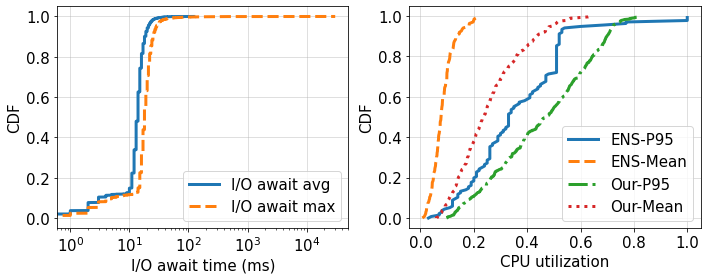

In [11]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig, axs = plt.subplots(1, 2,figsize = (10, 4))

ax0=axs[1]
ax0.plot(sorted(imc_cpu_p95),np.arange(len(imc_cpu_p95)) / len(imc_cpu_p95), 
         color=colors[0], ls='-',linewidth=3, label="ENS-P95")
ax0.plot(sorted(imc_cpu_mean),np.arange(len(imc_cpu_mean)) / len(imc_cpu_mean), 
         color=colors[1], ls='--',linewidth=3, label="ENS-Mean")
ax0.plot(sorted(vldb_cpu_p95),np.arange(len(vldb_cpu_p95)) / len(vldb_cpu_p95), 
         color=colors[2], ls='-.',linewidth=3, label="Our-P95")
ax0.plot(sorted(vldb_cpu_mean),np.arange(len(vldb_cpu_mean)) / len(vldb_cpu_mean), 
         color=colors[3], ls=':',linewidth=3, label="Our-Mean")
ax0.grid(alpha=0.5)
ax0.tick_params(axis='both', which='major', labelsize=15)
# ax0.set_xscale('log')
ax0.set_xlabel('CPU utilization' , fontsize=15)
ax0.set_ylabel('CDF', fontsize=15)
ax0.legend(fontsize=15)

ax1 = axs[0]
ax1.plot(sorted(io_avg_a),np.arange(len(io_avg_a)) / len(io_avg_a), 
         color=colors[0], ls='-',linewidth=3, label="I/O await avg")
ax1.plot(sorted(io_avg_m),np.arange(len(io_avg_m)) / len(io_avg_m), 
         color=colors[1], ls='--',linewidth=3, label="I/O await max")
ax1.grid(alpha=0.5)
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.set_xscale('log')
ax1.set_xlabel('I/O await time (ms)' , fontsize=15)
ax1.set_ylabel('CDF', fontsize=15)
ax1.legend(fontsize=15)
fig.tight_layout()
# fig.savefig('./qos_io_cpu.pdf')